<a href="https://colab.research.google.com/github/rogeriomoreirajr/TCC-PUC-Minas/blob/master/4_An%C3%A1lise%2C_Explora%C3%A7%C3%A3o_e_Visualiza%C3%A7%C3%A3o_dos_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import os
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
import re

sns.set_style("dark")

path = '/content/drive/My Drive/EAD/PUC Minas/13 - TCC/data'
png_path = '/content/drive/My Drive/EAD/PUC Minas/13 - TCC/png/'
''
os.chdir(path)

def get_df(filename, column_dates = ['data']):
    df = pd.read_csv(filename, parse_dates=column_dates)
    return df

def dt_from_week(numsemana):
    return datetime.strptime(numsemana+'-1', '%Y-%U-%w')


q1 =  get_df('question1.csv', None)
q1['data'] = q1['data'].apply(dt_from_week)

q2a = get_df('question2a.csv')
q2b = get_df('question2b.csv')
q3 =  get_df('question3.csv')
q4a = get_df('question4a.csv')
q4b = get_df('question4b.csv')
q4c = get_df('question4c.csv')

# 4.1. Quando e como lá fora
> Como o preço da gasolina se comporta ao longo dos anos, levando em consideração o preço do dólar e do barril de petróleo Brent?


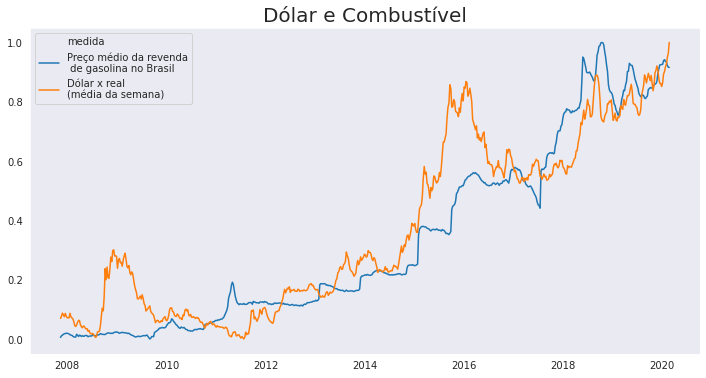

In [0]:
titles = {'cambio': 'Dólar x real \n(média da semana)', 
 'close': 'Preço do Petróleo Brent \n(em USD)', 
 'barril_reais': 'Preço do Petróleo Brent \n(em R$)', 
 'preco_medio_revenda': 'Preço médio da revenda\n de gasolina no Brasil'}


# Normalizar o banco de dados

q1 = q1.set_index('data')

# A normalização aqui é feita subtraindo a série pelo valor mínimo
# e dividindo o resultado pela amplitude (valor máximo menos o mínimo).
# Assim todos os resultados ficam entre 0 e 1, e nos permite comparar
# tendências em séries com escalas diferentes
q1_norm = (q1-q1.min())/ (q1.max()-q1.min())

# Mostrar o dolár e o preço
data = q1_norm.drop(['close', 'barril_reais'], axis=1)
data = data.reset_index().melt(id_vars='data', 
                        var_name='medida',
                        value_name='valor')

data.medida = data.medida.replace(titles)

fig, ax = plt.subplots(figsize=(12,6))
g = sns.lineplot(x='data', y='valor', hue='medida', data=data, ax=ax)

plt.xlabel("")
plt.ylabel("")
plt.title("Dólar e Combustível", size=20)

# ylabels = ['R$ {:,.2f}'.format(x) for x in g.get_yticks()]
# g.set_yticklabels(ylabels)

plt.show(g)
g.figure.savefig(png_path+'4.1a_.png',  bbox_inches='tight')
# Correlação entre as duas

# q1.corr()

In [0]:
# Barril pelo dólar e o preço

# Mostrar o dolár e o preço
data = q1_norm.drop(['cambio'], axis=1)
data = data.reset_index().melt(id_vars='data', 
                        var_name='medida',
                        value_name='valor')

data.medida = data.medida.replace(titles)

fig, ax = plt.subplots(figsize=(12,6))
g = sns.lineplot(x='data', y='valor', hue='medida', data=data, ax=ax)

plt.xlabel("")
plt.ylabel("")
plt.title("Barril (em reais) e Combustível", size=20)

# ylabels = ['R$ {:,.2f}'.format(x) for x in g.get_yticks()]
# g.set_yticklabels(ylabels)

plt.show(g)
g.figure.savefig(png_path+'4.1b_.png',  bbox_inches='tight')

# Correlação
q1_norm.corr()

,preco_medio_revenda,cambio,close,barril_reais
preco_medio_revenda,1.000000,0.927571,-0.515620,0.522364
cambio,0.927571,1.000000,-0.698316,0.359579
close,-0.515620,-0.698316,1.000000,0.383713
barril_reais,0.522364,0.359579,0.383713,1.000000


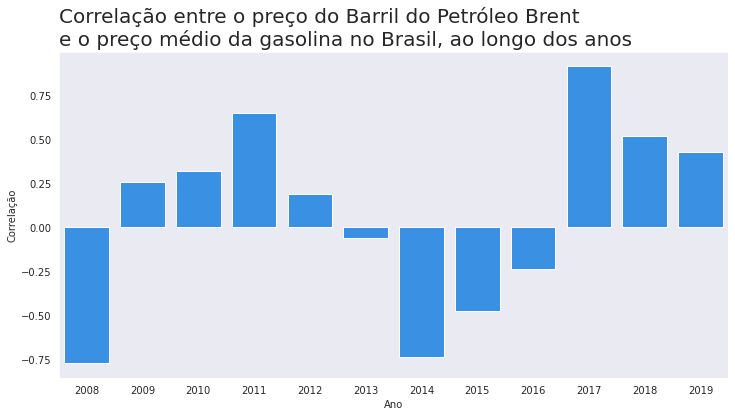

In [0]:
# Correlação ano a ano, do preço da gasolina e barril em reais

data = q1.drop(['cambio','barril_reais'], axis=1).reset_index()

l = []

for ano in range(2008, 2020):
    filtro = data.data.dt.year==ano
    corr = data[filtro].set_index('data').corr().iloc[0,1]
    l.append({'Ano':ano, 'Correlação':corr})

data = pd.DataFrame(l).set_index('Ano')

fig, ax = plt.subplots(figsize=(12,6))
g = sns.barplot(x='Ano', y='Correlação', color='dodgerblue',data=data.reset_index(), ax=ax)

plt.title("Correlação entre o preço do Barril do Petróleo Brent\ne o preço médio da gasolina no Brasil, ao longo dos anos", 
          size=20, loc='left')

plt.show(g)

# g.figure.savefig(png_path+'4.1c.png',  bbox_inches='tight')

# 4.2. Quando e como lá fora
> Como os índices de inflação da gasolina também se comportam aqui no Brasil, levando em conta o IPCA e o valor da cesta básica?

In [0]:
df2a = q2a.copy()
df2b = q2b.copy()

df2a['abrangencia'] = 'Belo Horizonte'
df2b['abrangencia'] = 'Brasil'

# a diferença entre o índice geral e o índice da gasolina
for df_ in [df2a, df2b]:
    df_['diff'] = df_['gasolina'] - df_['indice geral']

tb = pd.concat([df2a, df2b])

# ano | mes | abrangencia | diff

data = tb[['data','gasolina','indice geral','abrangencia']].copy()
data['ano'] = data.data.dt.year
data['mes'] = data.data.dt.month

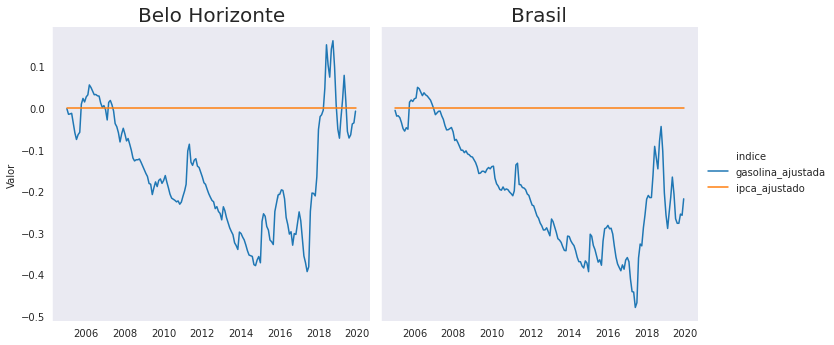

In [0]:
# Tabela para o gráfico de linha

data = tb[['data','abrangencia','gasolina_ajustada','ipca_ajustado']].copy()
data['ano'] = data.data.dt.year
data['mes'] = data.data.dt.month

data.gasolina_ajustada = data.gasolina_ajustada - data.ipca_ajustado
data.ipca_ajustado = 0

data = data.melt(id_vars=['data','abrangencia'],
                 value_vars=['gasolina_ajustada','ipca_ajustado'],
                 var_name='indice',
                 value_name = 'valor')

# fig, ax = plt.subplots(figsize=(12,6))

g = sns.relplot(x="data", y="valor",
            col="abrangencia", hue='indice',
            # facet_kws=dict(sharex=False, sharey=False),
            kind="line", data=data, legend='full',)

g = (g.set_axis_labels('','Valor'))
g.set_titles('{col_name}', size=20)

plt.show(g)

# g.savefig(png_path+'3.2a.png')

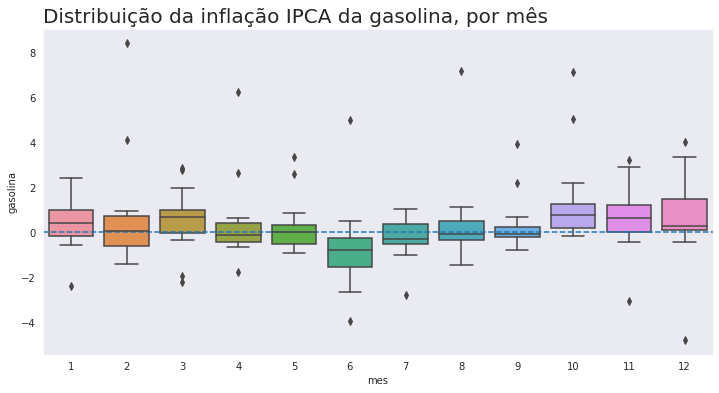

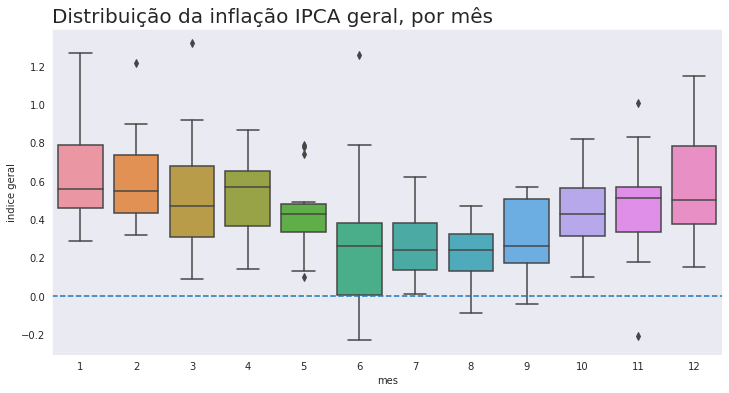

In [0]:

data = tb[['data','abrangencia','gasolina','indice geral']].copy()
data['ano'] = data.data.dt.year
data['mes'] = data.data.dt.month


data = data.drop('data', axis=1)
data = data.query('abrangencia == "Brasil"')

# sns.heatmap(data)

# g = (g.set_axis_labels('','Valor'))
# g.set_titles('{col_name}', size=20)

# O preço da gasolina cai em junho
# data.mean().plot()

# Box-plot do IPCA Gasolina
fig, ax = plt.subplots(figsize=(12,6))
g = sns.boxplot(x='mes', y='gasolina', data=data, ax=ax)
ax1 = g.axes
ax1.axhline(0, ls='--')
plt.title("Distribuição da inflação IPCA da gasolina, por mês", 
          size=20, loc='left')
plt.show(g)

# Box-plot do IPCA Geral
fig, ax = plt.subplots(figsize=(12,6))
g = sns.boxplot(x='mes', y='indice geral', data=data, ax=ax)
ax1 = g.axes
ax1.axhline(0, ls='--')
plt.title("Distribuição da inflação IPCA geral, por mês", 
          size=20, loc='left')
plt.show(g)

# ax2.axhline(30, ls='--')

# data

# E se fizer isso com o preço da gasolina, nos dados do Brasil?

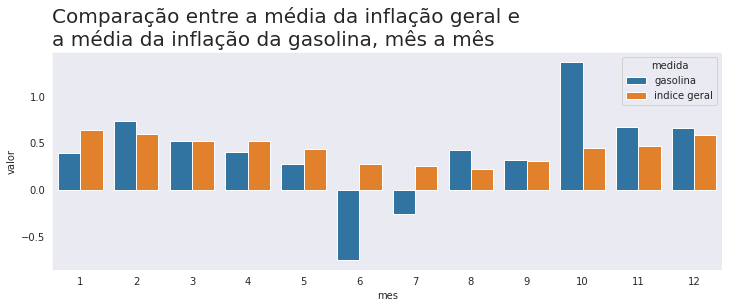

In [0]:
# Média de aumento dos meses:

tb = data.groupby('mes')[['gasolina','indice geral']].mean().reset_index()

tb = tb.melt(id_vars='mes')
tb.columns = ['mes','medida','valor']

# Box-plot do IPCA Geral
fig, ax = plt.subplots(figsize=(12,4))
g = sns.barplot(x='mes', y='valor', hue='medida', data=tb, ax=ax)
ax1 = g.axes
plt.title("Comparação entre a média da inflação geral e \na média da inflação da gasolina, mês a mês", 
          size=20, loc='left')
plt.show(g)


# 4.3. Onde e quanto, aqui dentro
> Qual a geografia do preço dos preços de combustível a nível nacional, e em recortes regionais e estaduais?

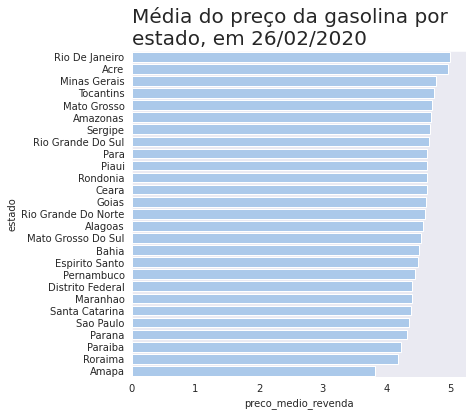

In [0]:
# O preço da última, por estado

f1 = q3.abrangencia == "estadual"
f2 = q3.data == q3.data.max()

data = q3[f1 & f2][['estado','preco_medio_revenda']].sort_values('preco_medio_revenda', ascending=False)
data['estado'] = data.estado.str.title()

sns.set_color_codes("pastel")

data_max = q3.data.max().strftime('%d/%m/%Y')

fig, ax = plt.subplots(figsize=(6,6))
g = sns.barplot(x='preco_medio_revenda', y='estado', 
                data=data, ax=ax, color='b')
ax1 = g.axes
plt.title("Média do preço da gasolina por\nestado, em {}".format(data_max), 
          size=20, loc='left')
plt.show(g)

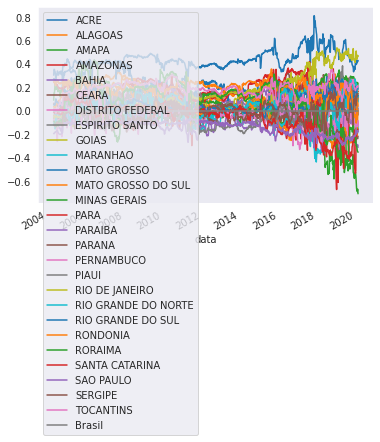

In [0]:
# Fazer aquele gráfico com as linhas e o nacional como zero

dfUF = q3[f1]
dfUF = dfUF.pivot('data', 'estado','preco_medio_revenda')

f = q3.abrangencia == 'nacional'
dfBR = q3[f].set_index('data').preco_medio_revenda.rename('Brasil')

data = pd.concat([dfUF, dfBR], axis=1)
data.subtract(data.Brasil, axis=0).plot()

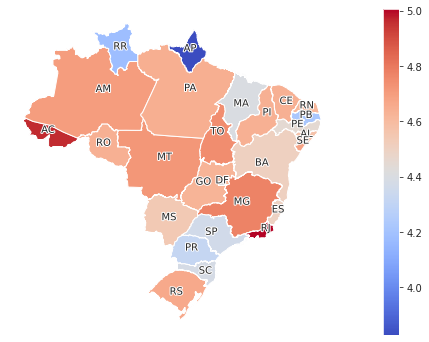

In [0]:
# Usar os dados de shapefile do Brasil, para poder ver o preço
# Fazer o mesmo por região

if not 'geopandas' in globals().keys():
    !pip install geopandas
    import geopandas

path = '/content/drive/My Drive/EAD/PUC Minas/13 - TCC/data/shapefile/estados.shp'

GEOdf = geopandas.read_file(path)

f1 = q3.abrangencia == "estadual"
f2 = q3.data == q3.data.max()

data = q3[f1 & f2][['estado','preco_medio_revenda']].sort_values('preco_medio_revenda', ascending=False)
data['estado'] = data.estado.str.title()

def from_De_to_de(string_):
    string_ = re.sub('D([aeiou]) ',r'd\1 ', string_)
    return string_

from_De_to_de('Rio De Janeiro')

estados = {
 'Amapa': 'Amapá',
 'Ceara':  'Ceará',
 'Espirito Santo':  'Espírito Santo',
 'Goias':  'Goiás',
 'Maranhao':  'Maranhão',
 'Para':  'Pará',
 'Paraiba':'Paraíba',
 'Parana':  'Paraná',
 'Piaui':  'Piauí',
 'Rondonia':  'Rondônia',
 'Sao Paulo':  'São Paulo'
}

data.estado = data.estado.apply(from_De_to_de)
data.estado = data.estado.replace(estados)

tb = GEOdf.merge(data, left_on='nome', right_on='estado')

fig, ax = plt.subplots(figsize=(10,6))

tb.plot(column = 'preco_medio_revenda', cmap='coolwarm', ax=ax, legend=True)

ax.set_yticklabels([])
ax.set_xticklabels([])

tb['coords'] = tb['geometry'].apply(lambda x: x.representative_point().coords[:])
tb['coords'] = [coords[0] for coords in tb['coords']]

import matplotlib.patheffects as path_effects

for idx, row in tb.iterrows():
    plt.annotate(s=row['sigla'], xy=row['coords'],
                 horizontalalignment='center',
                 path_effects = [path_effects.withStroke(linewidth=2, foreground="w")])

ax.set_facecolor('white')

In [0]:
# São Paulo e Rio de Janeiro

tb.set_index('estado').preco_medio_revenda

estado
Acre                   4.962
Alagoas                4.574
Amazonas               4.700
Amapá                  3.828
Bahia                  4.507
Ceará                  4.641
Distrito Federal       4.409
Espírito Santo         4.500
Goiás                  4.627
Maranhão               4.400
Minas Gerais           4.773
Mato Grosso do Sul     4.542
Mato Grosso            4.721
Pará                   4.645
Paraíba                4.224
Pernambuco             4.453
Piauí                  4.642
Paraná                 4.319
Rio de Janeiro         5.007
Rio Grande do Norte    4.613
Rondônia               4.641
Roraima                4.182
Rio Grande do Sul      4.665
Santa Catarina         4.381
Sergipe                4.682
São Paulo              4.363
Tocantins              4.747
Name: preco_medio_revenda, dtype: float64

In [0]:
# Dados de impostos por estado

url = "https://www.combustivellegal.com.br/metas/simpli%EF%AC%81cacao-e-uniformizacao-das-aliquotas-de-icms-entre-os-estados"

from bs4 import BeautifulSoup
import requests

soup = BeautifulSoup(requests.get(url).content)


l = []
for div in soup.findAll('div', 'div_map'):
    dados = {'estado' : re.sub('^ ','', div.h3.text),
             'aliquota' : re.search('tipo C: (\d+)', div.p.text).group(1)}
    l.append(dados)

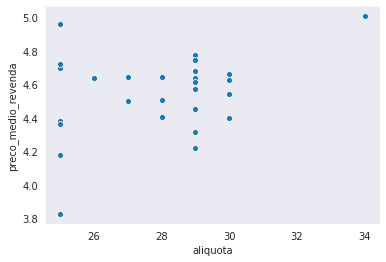

In [0]:
# div = soup.findAll('div', 'div_map')[0]

sr1 = pd.DataFrame(l).set_index('estado').aliquota.astype(int)
sr2 = tb.set_index('estado').preco_medio_revenda

data = pd.concat([sr1, sr2], axis=1)
# tb.plot(kind='scatter', x='aliquota', y='preco_medio_revenda')

sns.scatterplot( x='aliquota', y='preco_medio_revenda', data=data)

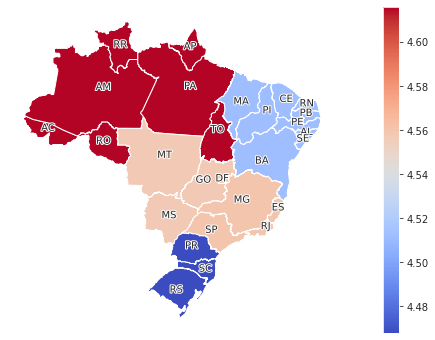

In [0]:
# Usar os dados de shapefile do Brasil, para poder ver o preço

if not 'geopandas' in globals().keys():
    !pip install geopandas
    import geopandas

path = '/content/drive/My Drive/EAD/PUC Minas/13 - TCC/data/shapefile/estados.shp'

GEOdf = geopandas.read_file(path)

f1 = q3.abrangencia == "regional"
f2 = q3.data == q3.data.max()

data = q3[f1 & f2][['regiao','preco_medio_revenda']].sort_values('preco_medio_revenda', ascending=False)

regioes = {
  'CENTRO OESTE':5, 
  'NORDESTE':4, 
  'NORTE':3, 
  'SUDESTE':2, 
  'SUL':1
}

data['regiao_id'] = data.regiao.replace(regioes).astype(str)

tb = GEOdf.merge(data, on = 'regiao_id')

fig, ax = plt.subplots(figsize=(10,6))

tb.plot(column = 'preco_medio_revenda', cmap='coolwarm', ax=ax, legend=True)

ax.set_yticklabels([])
ax.set_xticklabels([])

tb['coords'] = tb['geometry'].apply(lambda x: x.representative_point().coords[:])
tb['coords'] = [coords[0] for coords in tb['coords']]

import matplotlib.patheffects as path_effects

for idx, row in tb.iterrows():
    plt.annotate(s=row['sigla'], xy=row['coords'],
                 horizontalalignment='center',
                 path_effects = [path_effects.withStroke(linewidth=2, foreground="w")])

ax.set_facecolor('white')

# 4.3. Onde e quanto, em Belo Horizonte
> Quais os postos de combustível mais baratos na cidade, nas últimas semanas? E como os preços na cidade se comportam em relação à média estadual, nos últimos anos?

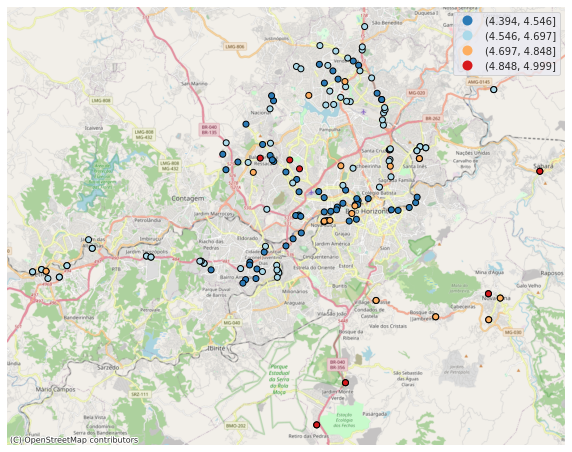

In [0]:
if not 'palettable' in globals().keys():
    !pip install palettable
    import palettable

cmap = palettable.colorbrewer.diverging.RdYlBu_4_r


if not 'ctx' in globals().keys():
    !pip install contextily
    import contextily as ctx

if not 'geopandas' in globals().keys():
    !pip install geopandas
    import geopandas


path = '/content/drive/My Drive/EAD/PUC Minas/13 - TCC/data/Postos de BH.kml'

# Ler os dados do kml
geopandas.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

GEOdf = geopandas.read_file(path)
GEOdf['endereco'] = GEOdf.Description.str.extract(' *endereco: ([^\<]+)')

f = q4c.ix_semana.isin(sorted(q4c.ix_semana.unique())[-2:])

GEOdf = GEOdf.merge(q4c[f], left_on = ('Name','endereco'), right_on = ('razao','endereco'))

GEOdf['quantile'] = pd.cut(GEOdf.venda, 4)


fig, ax = plt.subplots(figsize=(10,10))

GEOdf = GEOdf.to_crs(epsg=3857)
ax_ = GEOdf.plot(ax=ax, alpha=1, edgecolor='k', 
                column = 'quantile', cmap=cmap.mpl_colormap, legend=True)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()

xlim = ax.axes.get_xlim()
ylim = ax.axes.get_ylim()

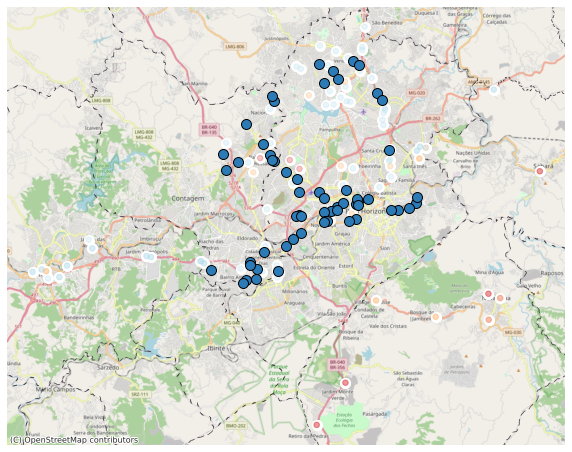

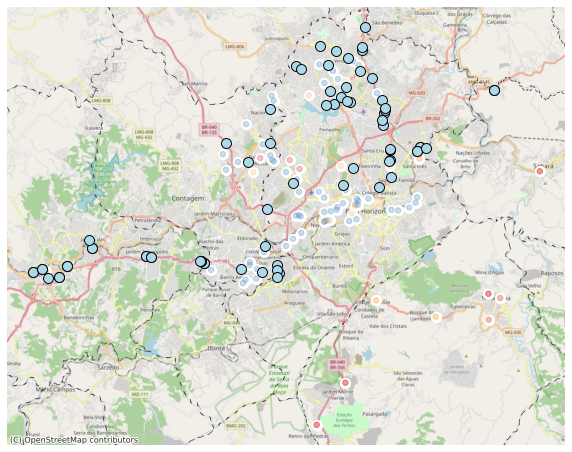

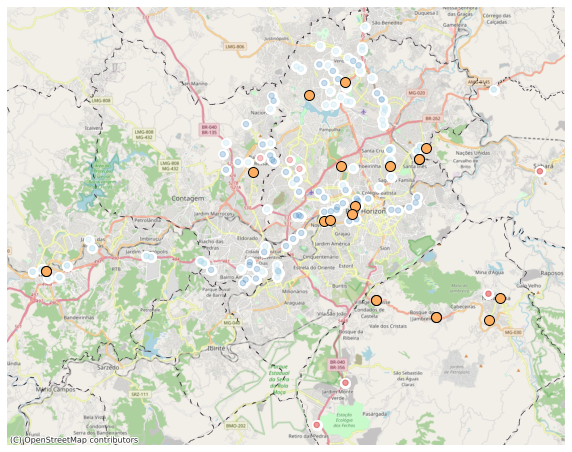

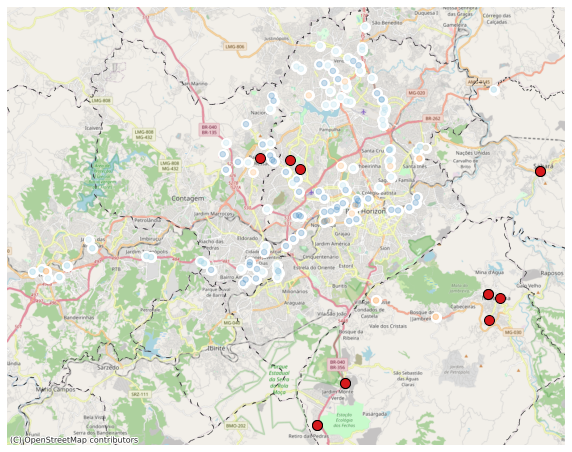

In [0]:
GEOdf = GEOdf.to_crs(epsg=3857)

path = "/content/drive/My Drive/EAD/PUC Minas/13 - TCC/data/shapefile/31MUE250GC_SIR.shp"
GEOmg = geopandas.read_file(path)
GEOmg = GEOmg.to_crs(epsg=3857)


colors = cmap.mpl_colors

for i, quantile in enumerate(sorted(GEOdf['quantile'].unique())):

    fig, ax = plt.subplots(figsize=(10,10))

    base_white = GEOdf.plot(ax=ax, alpha=1, edgecolor='white',
                        facecolor='white', markersize=100, zorder=1)

    base = GEOdf.plot(ax=ax, alpha=0.25, column = 'quantile', 
                      cmap=cmap.mpl_colormap, markersize=30, zorder=2)

    cities = GEOmg.plot(ax=ax, facecolor='none', 
                    edgecolor='0.25', lw=0.7, zorder=0.5,
                    linestyle = (0,(5,10)))


    GEOdf_ = GEOdf[GEOdf['quantile'] == quantile]
    color = colors[i]
    ax_ = GEOdf_.plot(ax = ax, figsize=(10, 10), alpha=1, 
                     edgecolor='k', facecolor=color, markersize=100, zorder=3)
    ax.set_axis_off()
    ax.axes.set_xlim(xlim)
    ax.axes.set_ylim(ylim)
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)


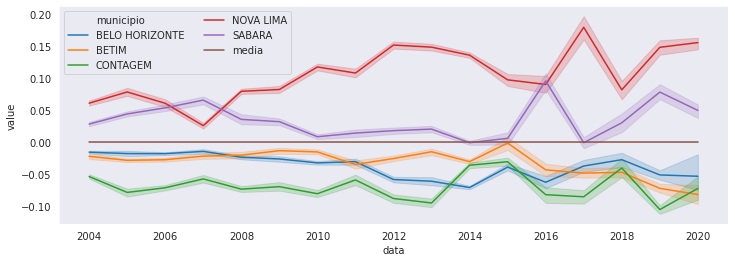

In [0]:
# Preço médio por cidade
not_city = ['SANTA LUZIA', 'VESPASIANO']

data = q4b[~q4b.municipio.isin(not_city)]

data = data.pivot('data','municipio','preço_medio_revenda')
data['media'] = data.mean(axis=1)

data = data.subtract(data['media'], axis=0)

data = data.reset_index().melt(id_vars='data')

fig, ax = plt.subplots(figsize=(12,4))
g = sns.lineplot(x=data.data.dt.year, y='value', hue='municipio', data=data, ax=ax)

ax.legend(loc='upper left', ncol=2,)
plt.show(g)


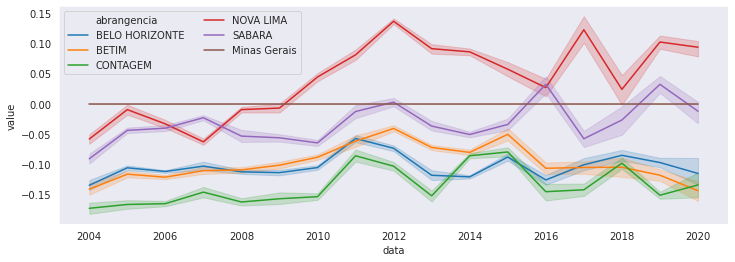

In [0]:
# Preço médio por cidade
data = q4b[~q4b.municipio.isin(not_city)]

data.columns = ['preco_medio_revenda',
                'abrangencia','data'] 

data = pd.concat([data, q4a.query('abrangencia == "Minas Gerais"')])

data = data.pivot('data','abrangencia','preco_medio_revenda')

data = data.subtract(data['Minas Gerais'], axis=0)

cols = ['BELO HORIZONTE', 'BETIM', 'CONTAGEM', 'NOVA LIMA',
       'SABARA', 'Minas Gerais', ]

data = data[cols].reset_index().melt(id_vars='data')

fig, ax = plt.subplots(figsize=(12,4))
g = sns.lineplot(x=data.data.dt.year, y='value', hue='abrangencia', data=data, ax=ax)

ax.legend(loc='upper left', ncol=2,)
plt.show(g)


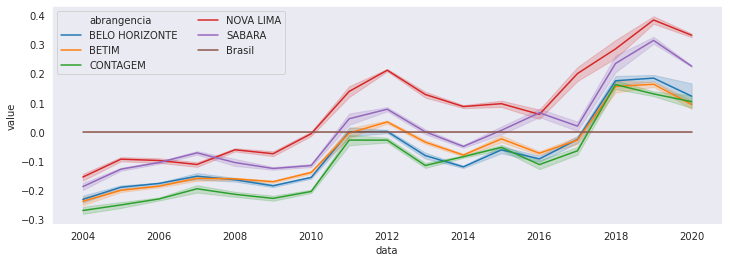

In [0]:
# Preço médio por cidade
data = q4b[~q4b.municipio.isin(not_city)]

data.columns = ['preco_medio_revenda',
                'abrangencia','data'] 

data = pd.concat([data, q4a.query('abrangencia == "Brasil"')])

data = data.pivot('data','abrangencia','preco_medio_revenda')

data = data.subtract(data['Brasil'], axis=0)

cols = ['BELO HORIZONTE', 'BETIM', 'CONTAGEM', 'NOVA LIMA',
       'SABARA', 'Brasil', ]

data = data[cols].reset_index().melt(id_vars='data')

fig, ax = plt.subplots(figsize=(12,4))
g = sns.lineplot(x=data.data.dt.year, y='value', hue='abrangencia', data=data, ax=ax)

ax.legend(loc='upper left', ncol=2,)
plt.show(g)
